In [1]:
library(DESeq2)
library(RColorBrewer)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: 'IRanges'


The following object is masked from 'package:grDevices':

    windows


Loading required package: GenomicRanges

Loading req

In [2]:
library(reshape2)


In [3]:
library("gplots")



Attaching package: 'gplots'


The following object is masked from 'package:IRanges':

    space


The following object is masked from 'package:S4Vectors':

    space


The following object is masked from 'package:stats':

    lowess




In [4]:
library(readxl)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%within%() masks IRanges::%within%()
✖ dplyr::collapse()     masks IRanges::collapse()
✖ dplyr::combine()      masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()        masks matrixStats::count()
✖ dplyr::desc()         masks IRanges::desc()
✖ tidyr::expand()       masks S4Vectors::expand()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::first()        masks S4Vectors::first()
✖ dplyr::lag()          masks stats::lag()
✖ ggplot2::Position()   masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()       masks GenomicRanges

In [5]:
library("pheatmap")
library("RColorBrewer")

In [6]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [7]:
HCOLOR = '#E26A2C'
HCOLOR_light = '#FDA65D'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'
PRO_COLOR = 'MediumSeaGreen'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

tpal = brewer.pal(5, "Purples")
gpal = brewer.pal(4, 'Dark2')
ann_colors = list(
    Timepoint = c('1'=tpal[1], '2'=tpal[2], '3'=tpal[3], 
                  '4'=tpal[4], '5'=tpal[5]),
    Group = c(P =PCOLOR_light, C = PRO_COLOR)
)


In [8]:
list.files()

[1] "CC1A3 RNASEQ 1A3 DESeq ref vs longterm.ipynb" 
 [2] "CC1A3 RNASEQ 1A3 DESeq.ipynb"                 
 [3] "CC1A3 RNASEQ MED4 correlation.ipynb"          
 [4] "CC1A3 RNASEQ MED4 DESeq ref vs longterm.ipynb"
 [5] "CC1A3 RNASEQ MED4 DESeq.ipynb"                
 [6] "CC1A3 RNASEQ MED4 DESeq_longterm2.ipynb"      
 [7] "CC1A3 WGCNA CC.ipynb"                         
 [8] "data"                                         
 [9] "DE_results"                                   
[10] "figures"

In [9]:
fname_counts = file.path('data', 'MED4_counts_combined.txt')

In [10]:
cdf = read.csv(fname_counts, sep='\t' )

In [11]:
rownames(cdf) = cdf$gene_id

In [12]:
md = read_excel(file.path('data','CC1A3_RNASEQ_metadata.xlsx'))

In [13]:
names(md)

[1] "sample_id"               "TGCnew#"                
 [3] "sample"                  "Conc.Qubit TGC [ng/ul]" 
 [5] "starting input RNA (ng)" "Lib_conc [ng/ul]"       
 [7] "Group"                   "Timepoint"              
 [9] "Replicate"               "Day"                    
[11] "extraction"              "techincal_replicate"

In [14]:
md = md %>% rename('init_RNA' = 'starting input RNA (ng)')

In [15]:
md = md %>% mutate(phase = factor(recode(Timepoint, 
                                  '1' = 'logExp', 
                                  '2' = 'decline' , 
                                  '3' = 'longterm' ,
                                  '4' = 'longterm' ,
                                  '5' = 'longterm' ,
                                         .default = 'NA'
                                 ), levels=c('logExp', 'decline', 'longterm', 'NA')))

In [16]:
group <- paste0(md$Group, md$Timepoint)
group
md$groupandtime = group

[1] "A1"       "A1"       "A1"       "A2"       "A2"       "A2"      
 [7] "A3"       "A3"       "A3"       "C1"       "C1"       "C1"      
[13] "C2"       "C2"       "C2"       "C2"       "C2"       "C3"      
[19] "C3"       "C3"       "C3"       "C3"       "C4"       "C4"      
[25] "C4"       "C5"       "C5"       "C5"       "MockMock" "P1"      
[31] "P1"       "P1"       "P2"       "P2"       "P2"

In [17]:
md = md %>% mutate(treatment = factor(recode(groupandtime, 
                                  'P1' = 'P1', 
                                  'P2' = 'P2', 
                                  'C1' = 'C1' , 
                                  'C2' = 'C2' , 
                                  'C3' = 'C3' ,
                                  'C4' = 'longterm' ,
                                  'C5' = 'longterm' ,
                                         .default = 'NA'
                                 ), levels=c('P1', 'P2', 'C1', 'C2', 'C3', 'longterm', 'NA')))

In [18]:
table(md$treatment)


      P1       P2       C1       C2       C3 longterm       NA 
       3        3        3        5        5        6       10 

In [19]:
head(md)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime,treatment
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>
A1A_S7,7,A1A,168.0,100,0.888,A,1,A,11,1,0,logExp,A1,NA
A1B_S8,8,A1B,99.8,100,0.850,A,1,B,11,1,0,logExp,A1,NA
A1C_S9,9,A1C,57.3,100,1.570,A,1,C,11,1,0,logExp,A1,NA
A2A_S10,10,A2A,69.0,100,0.592,A,2,A,18,2,0,decline,A2,NA
A2B_S11,11,A2B,41.9,100,0.570,A,2,B,18,2,0,decline,A2,NA
A2C_S12,12,A2C,67.2,100,0.980,A,2,C,18,4,0,decline,A2,NA


In [20]:
md$Group = factor(md$Group, levels = c('P', 'C', 'A', 'Mock'))


In [21]:
head(cdf)

,gene_id,gene,product,protein_id,old_locus_tag,A1A_S7,A1B_S8,A1C_S9,A2A_S10,A2B_S11,⋯,C5A_S32,C5B_S33,C5C_S34,Mock_S35,P6A_S1,P6B_S2,P6C_S3,P7A_S4,P7B_S5,P7C_S6
,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TX50_RS00020,TX50_RS00020,dnaN,DNA polymerase III subunit beta,WP_011131639.1,NA,0,0,0,1,0,⋯,1303,591,765,0,3076,3135,2995,2956,4869,4302
TX50_RS00025,TX50_RS00025,,hypothetical protein,WP_011131640.1,NA,2,2,0,0,0,⋯,85,23,66,2,427,310,491,111,198,191
TX50_RS00030,TX50_RS00030,purL,phosphoribosylformylglycinamidine synthase subunit PurL,WP_011131641.1,NA,0,4,3,3,3,⋯,513,328,518,0,1162,1365,1266,1878,3482,3459
TX50_RS00035,TX50_RS00035,purF,amidophosphoribosyltransferase,WP_011131642.1,NA,0,1,1,0,0,⋯,238,115,209,0,914,1196,1035,516,1070,1166
TX50_RS00040,TX50_RS00040,,DNA topoisomerase 4 subunit A,WP_011131643.1,NA,0,8,0,2,5,⋯,491,218,354,0,1761,2014,1799,1399,1297,1216
TX50_RS00045,TX50_RS00045,,tetratricopeptide repeat protein,WP_011131644.1,NA,0,0,0,0,0,⋯,80,33,55,0,273,200,305,250,517,345


In [22]:
counts = cdf[,-c(1,2,3,4,5)]
genes = cdf[,c(1,2,3,4,5)]

In [23]:
head(md)
head(counts)
head(genes)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime,treatment
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>
A1A_S7,7,A1A,168.0,100,0.888,A,1,A,11,1,0,logExp,A1,NA
A1B_S8,8,A1B,99.8,100,0.850,A,1,B,11,1,0,logExp,A1,NA
A1C_S9,9,A1C,57.3,100,1.570,A,1,C,11,1,0,logExp,A1,NA
A2A_S10,10,A2A,69.0,100,0.592,A,2,A,18,2,0,decline,A2,NA
A2B_S11,11,A2B,41.9,100,0.570,A,2,B,18,2,0,decline,A2,NA
A2C_S12,12,A2C,67.2,100,0.980,A,2,C,18,4,0,decline,A2,NA


,A1A_S7,A1B_S8,A1C_S9,A2A_S10,A2B_S11,A2C_S12,A3A_S13,A3B_S14,A3C_S15,C1A_S16,⋯,C5A_S32,C5B_S33,C5C_S34,Mock_S35,P6A_S1,P6B_S2,P6C_S3,P7A_S4,P7B_S5,P7C_S6
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TX50_RS00020,0,0,0,1,0,4,0,0,0,1119,⋯,1303,591,765,0,3076,3135,2995,2956,4869,4302
TX50_RS00025,2,2,0,0,0,0,0,0,0,127,⋯,85,23,66,2,427,310,491,111,198,191
TX50_RS00030,0,4,3,3,3,4,2,0,5,359,⋯,513,328,518,0,1162,1365,1266,1878,3482,3459
TX50_RS00035,0,1,1,0,0,4,0,0,0,326,⋯,238,115,209,0,914,1196,1035,516,1070,1166
TX50_RS00040,0,8,0,2,5,0,4,7,0,600,⋯,491,218,354,0,1761,2014,1799,1399,1297,1216
TX50_RS00045,0,0,0,0,0,3,1,0,0,113,⋯,80,33,55,0,273,200,305,250,517,345


,gene_id,gene,product,protein_id,old_locus_tag
,<chr>,<chr>,<chr>,<chr>,<lgl>
TX50_RS00020,TX50_RS00020,dnaN,DNA polymerase III subunit beta,WP_011131639.1,NA
TX50_RS00025,TX50_RS00025,,hypothetical protein,WP_011131640.1,NA
TX50_RS00030,TX50_RS00030,purL,phosphoribosylformylglycinamidine synthase subunit PurL,WP_011131641.1,NA
TX50_RS00035,TX50_RS00035,purF,amidophosphoribosyltransferase,WP_011131642.1,NA
TX50_RS00040,TX50_RS00040,,DNA topoisomerase 4 subunit A,WP_011131643.1,NA
TX50_RS00045,TX50_RS00045,,tetratricopeptide repeat protein,WP_011131644.1,NA


In [24]:
table(md$sample_id == names(counts))


TRUE 
  35 

# Remove the 60ng technical replicate and non P ,C samples

In [25]:
counts = cdf[,-c(1,2,3,4,5)]
genes = cdf[,c(1,2,3,4,5)]

In [26]:
# remove last 5 lines that are not genes
counts = head(counts, -5)
genes = head(genes, -5)

In [27]:
md_noalt = filter(md, Group %in% c('P', 'C'), techincal_replicate %in% 0)


In [28]:
counts_no_alt = select(counts, md_noalt$sample_id)

In [29]:
table(md_noalt$sample_id == names(counts_no_alt))


TRUE 
  21 

In [30]:
cts = counts_no_alt
coldata= md_noalt


In [31]:
head(coldata)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime,treatment
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>
C1A_S16,16,C1A,300.0,100,1.15,C,1,A,11,1,0,logExp,C1,C1
C1B_S17,17,C1B,84.9,100,1.91,C,1,B,11,1,0,logExp,C1,C1
C1C_S18,18,C1C,56.5,100,2.24,C,1,C,11,2,0,logExp,C1,C1
C2A_60ng_S19,19,C2A,6.3,60,1.87,C,2,A,18,4,0,decline,C2,C2
C2B_100ng_S20,20,C2B_1,31.1,100,2.28,C,2,B,18,2,0,decline,C2,C2
C2C_100ng_S22,22,C2C_1,15.7,100,2.80,C,2,C,18,2,0,decline,C2,C2


In [32]:
head(cts)

,C1A_S16,C1B_S17,C1C_S18,C2A_60ng_S19,C2B_100ng_S20,C2C_100ng_S22,C3A_100ng_S24,C3B_60ng_S26,C3C_100ng_S27,C4A_S29,⋯,C4C_S31,C5A_S32,C5B_S33,C5C_S34,P6A_S1,P6B_S2,P6C_S3,P7A_S4,P7B_S5,P7C_S6
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TX50_RS00020,1119,2394,5314,613,2227,3769,355,2220,1046,1384,⋯,1526,1303,591,765,3076,3135,2995,2956,4869,4302
TX50_RS00025,127,331,450,93,141,268,26,106,29,86,⋯,93,85,23,66,427,310,491,111,198,191
TX50_RS00030,359,907,1796,238,542,1061,239,961,471,671,⋯,1169,513,328,518,1162,1365,1266,1878,3482,3459
TX50_RS00035,326,767,540,181,385,692,102,492,150,328,⋯,404,238,115,209,914,1196,1035,516,1070,1166
TX50_RS00040,600,1572,2758,408,1242,1833,182,745,313,621,⋯,689,491,218,354,1761,2014,1799,1399,1297,1216
TX50_RS00045,113,212,538,111,150,249,17,221,69,134,⋯,79,80,33,55,273,200,305,250,517,345


In [33]:
coldata$groupandtime = factor(coldata$groupandtime, levels=c("C1", "P2","P1", "C2", "C3", "C4", "C5"))
coldata$treatment = factor(coldata$treatment, levels=c('P1', 'P2', 'C1', 'C2', 'C3', 'longterm'))


coldata$Group = factor(coldata$Group, levels=c("P", "C"))
coldata$Timepoint = factor(coldata$Timepoint, levels=c(1,2,3,4,5))
coldata$extraction = factor(coldata$extraction)


In [34]:
colnames(cts) = coldata$sample
rownames(coldata) = coldata$sample


Warning message:
"Setting row names on a tibble is deprecated."


In [35]:
dput(unique(coldata$groupandtime))
dput(unique(coldata$Group))

structure(c(1L, 4L, 5L, 6L, 7L, 3L, 2L), levels = c("C1", "P2", 
"P1", "C2", "C3", "C4", "C5"), class = "factor")
structure(2:1, levels = c("P", "C"), class = "factor")


In [36]:
rownames(coldata) = coldata$sample



Warning message:
"Setting row names on a tibble is deprecated."


In [37]:
rownames(coldata)

[1] "C1A"   "C1B"   "C1C"   "C2A"   "C2B_1" "C2C_1" "C3A_1" "C3B"   "C3C_1"
[10] "C4A"   "C4B"   "C4C"   "C5A"   "C5B"   "C5C"   "P1A"   "P1B"   "P1C"  
[19] "P2A"   "P2B"   "P2C"

In [38]:
all(rownames(coldata) == colnames(cts))

[1] TRUE

In [39]:
design = model.matrix(~ 0+ extraction + treatment, data = coldata)

In [40]:
design

,extraction1,extraction2,extraction3,extraction4,extraction5,extraction6,extraction7,treatmentP2,treatmentC1,treatmentC2,treatmentC3,treatmentlongterm
C1A,1,0,0,0,0,0,0,0,1,0,0,0
C1B,1,0,0,0,0,0,0,0,1,0,0,0
C1C,0,1,0,0,0,0,0,0,1,0,0,0
C2A,0,0,0,1,0,0,0,0,0,1,0,0
C2B_1,0,1,0,0,0,0,0,0,0,1,0,0
C2C_1,0,1,0,0,0,0,0,0,0,1,0,0
C3A_1,0,0,0,1,0,0,0,0,0,0,1,0
C3B,0,0,0,0,1,0,0,0,0,0,1,0
C3C_1,0,0,0,1,0,0,0,0,0,0,1,0
C4A,0,0,0,0,1,0,0,0,0,0,0,1


In [41]:
design = subset(design, select=-c(extraction7))

In [42]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design= ~treatment)

In [43]:
mcols(dds) <- DataFrame(mcols(dds), genes)
mcols(dds)

DataFrame with 1865 rows and 5 columns
                  gene_id        gene                product     protein_id
              <character> <character>            <character>    <character>
TX50_RS00020 TX50_RS00020        dnaN DNA polymerase III s.. WP_011131639.1
TX50_RS00025 TX50_RS00025               hypothetical protein WP_011131640.1
TX50_RS00030 TX50_RS00030        purL phosphoribosylformyl.. WP_011131641.1
TX50_RS00035 TX50_RS00035        purF amidophosphoribosylt.. WP_011131642.1
TX50_RS00040 TX50_RS00040             DNA topoisomerase 4 .. WP_011131643.1
...                   ...         ...                    ...            ...
TX50_RS09870 TX50_RS09870               hypothetical protein WP_225866747.1
TX50_RS09875 TX50_RS09875               hypothetical protein WP_225866749.1
TX50_RS09880 TX50_RS09880             SxtJ family membrane.. WP_011132879.1
TX50_RS09885 TX50_RS09885             DUF5989 family protein WP_225866752.1
TX50_RS09890 TX50_RS09890               hypotheti

In [44]:
dds

class: DESeqDataSet 
dim: 1865 21 
metadata(1): version
assays(1): counts
rownames(1865): TX50_RS00020 TX50_RS00025 ... TX50_RS09885 TX50_RS09890
rowData names(5): gene_id gene product protein_id old_locus_tag
colnames(21): C1A C1B ... P2B P2C
colData names(15): sample_id TGCnew# ... groupandtime treatment

In [45]:
keep <- rowSums(counts(dds)) >= 10
table(keep)
dds <- dds[keep,]

keep
FALSE  TRUE 
   10  1855 

In [46]:
names(colData(dds))

[1] "sample_id"              "TGCnew#"                "sample"                
 [4] "Conc.Qubit TGC [ng/ul]" "init_RNA"               "Lib_conc [ng/ul]"      
 [7] "Group"                  "Timepoint"              "Replicate"             
[10] "Day"                    "extraction"             "techincal_replicate"   
[13] "phase"                  "groupandtime"           "treatment"

In [47]:
dds$groupandtime = factor(dds$groupandtime, levels=c("C1", "P2","P1", "C2", "C3", "C4", "C5"))
dds$treatment = factor(dds$treatment, levels=c('P1', 'P2', 'C1', 'C2', 'C3', 'longterm'))

dds$Group = factor(dds$Group, levels=c("P", "C"))
dds$Timepoint = factor(dds$Timepoint, levels=c(1,2,3,4,5))
dds$extraction = factor(dds$extraction)


In [48]:
table(dds$treatment)
table(coldata$treatment)


      P1       P2       C1       C2       C3 longterm 
       3        3        3        3        3        6 


      P1       P2       C1       C2       C3 longterm 
       3        3        3        3        3        6 

In [49]:
vsd <- vst(dds, blind = FALSE)
head(assay(vsd), 3)

,C1A,C1B,C1C,C2A,C2B_1,C2C_1,C3A_1,C3B,C3C_1,C4A,⋯,C4C,C5A,C5B,C5C,P1A,P1B,P1C,P2A,P2B,P2C
TX50_RS00020,10.197789,10.137026,11.551839,10.231606,10.845970,10.967706,10.276325,10.707136,10.924569,10.787761,⋯,10.672786,10.902576,10.827062,10.565269,10.144407,10.131804,9.978487,11.671083,12.074911,12.088826
TX50_RS00025,7.189850,7.393002,8.063591,7.604710,7.021640,7.283135,6.700137,6.543573,6.075139,6.945366,⋯,6.818325,7.111350,6.396242,7.168143,7.405143,6.951857,7.471048,7.090091,7.564569,7.695121
TX50_RS00030,8.595018,8.767077,10.000578,8.894006,8.842382,9.165596,9.713759,9.515646,9.786708,9.755955,⋯,10.292260,9.574673,9.986908,10.009402,8.770248,8.956367,8.764391,11.020363,11.593161,11.775361


In [50]:
head(colData(vsd))

DataFrame with 6 rows and 16 columns
          sample_id   TGCnew#      sample Conc.Qubit TGC [ng/ul]  init_RNA
        <character> <numeric> <character>              <numeric> <numeric>
C1A         C1A_S16        16         C1A                  300.0       100
C1B         C1B_S17        17         C1B                   84.9       100
C1C         C1C_S18        18         C1C                   56.5       100
C2A    C2A_60ng_S19        19         C2A                    6.3        60
C2B_1 C2B_100ng_S20        20       C2B_1                   31.1       100
C2C_1 C2C_100ng_S22        22       C2C_1                   15.7       100
      Lib_conc [ng/ul]    Group Timepoint   Replicate         Day extraction
             <numeric> <factor>  <factor> <character> <character>   <factor>
C1A               1.15        C         1           A          11          1
C1B               1.91        C         1           B          11          1
C1C               2.24        C         1           C  

In [51]:
rld <- rlog(dds, blind = FALSE)
head(assay(rld), 3)

,C1A,C1B,C1C,C2A,C2B_1,C2C_1,C3A_1,C3B,C3C_1,C4A,⋯,C4C,C5A,C5B,C5C,P1A,P1B,P1C,P2A,P2B,P2C
TX50_RS00020,10.300147,10.251407,11.394582,10.327661,10.819670,10.918220,10.364121,10.707662,10.883111,10.772660,⋯,10.680034,10.865371,10.804290,10.593838,10.257184,10.247162,10.125624,11.492279,11.825993,11.83750
TX50_RS00025,7.016846,7.191345,7.760562,7.365119,6.873271,7.097277,6.614246,6.460927,6.081696,6.808897,⋯,6.699871,6.949924,6.365830,6.997589,7.202039,6.812469,7.258447,6.931879,7.335826,7.44594
TX50_RS00030,8.784346,8.919261,9.916376,9.024727,8.980559,9.239191,9.682486,9.521955,9.741738,9.716858,⋯,10.154912,9.569931,9.904021,9.922877,8.921465,9.070653,8.916672,10.756472,11.235489,11.38882


In [52]:
sampleDists <- dist(t(assay(vsd)))
sampleDists

           C1A      C1B      C1C      C2A    C2B_1    C2C_1    C3A_1      C3B
C1B   19.65269                                                               
C1C   52.25941 52.53176                                                      
C2A   38.37592 35.84882 52.63746                                             
C2B_1 31.70735 32.96120 34.88449 32.22853                                    
C2C_1 32.97042 34.26810 31.80592 37.37441 16.18414                           
C3A_1 52.92281 51.06407 51.73727 41.99862 38.04295 39.20471                  
C3B   46.02848 45.69288 44.86210 43.46264 29.84988 27.68058 34.89263         
C3C_1 56.05327 55.24051 48.97916 44.23701 37.15591 37.78361 31.54297 24.15568
C4A   44.14446 43.47056 43.11782 36.80320 27.94519 28.97148 34.05427 21.31848
C4B   44.38110 43.63485 44.38586 37.66142 29.16771 29.42837 33.40209 22.06604
C4C   55.79554 54.80017 50.21628 57.10986 41.37360 38.69104 46.77033 27.42832
C5A   41.15866 39.61349 45.38460 37.36417 29.65561 29.38075 32.7

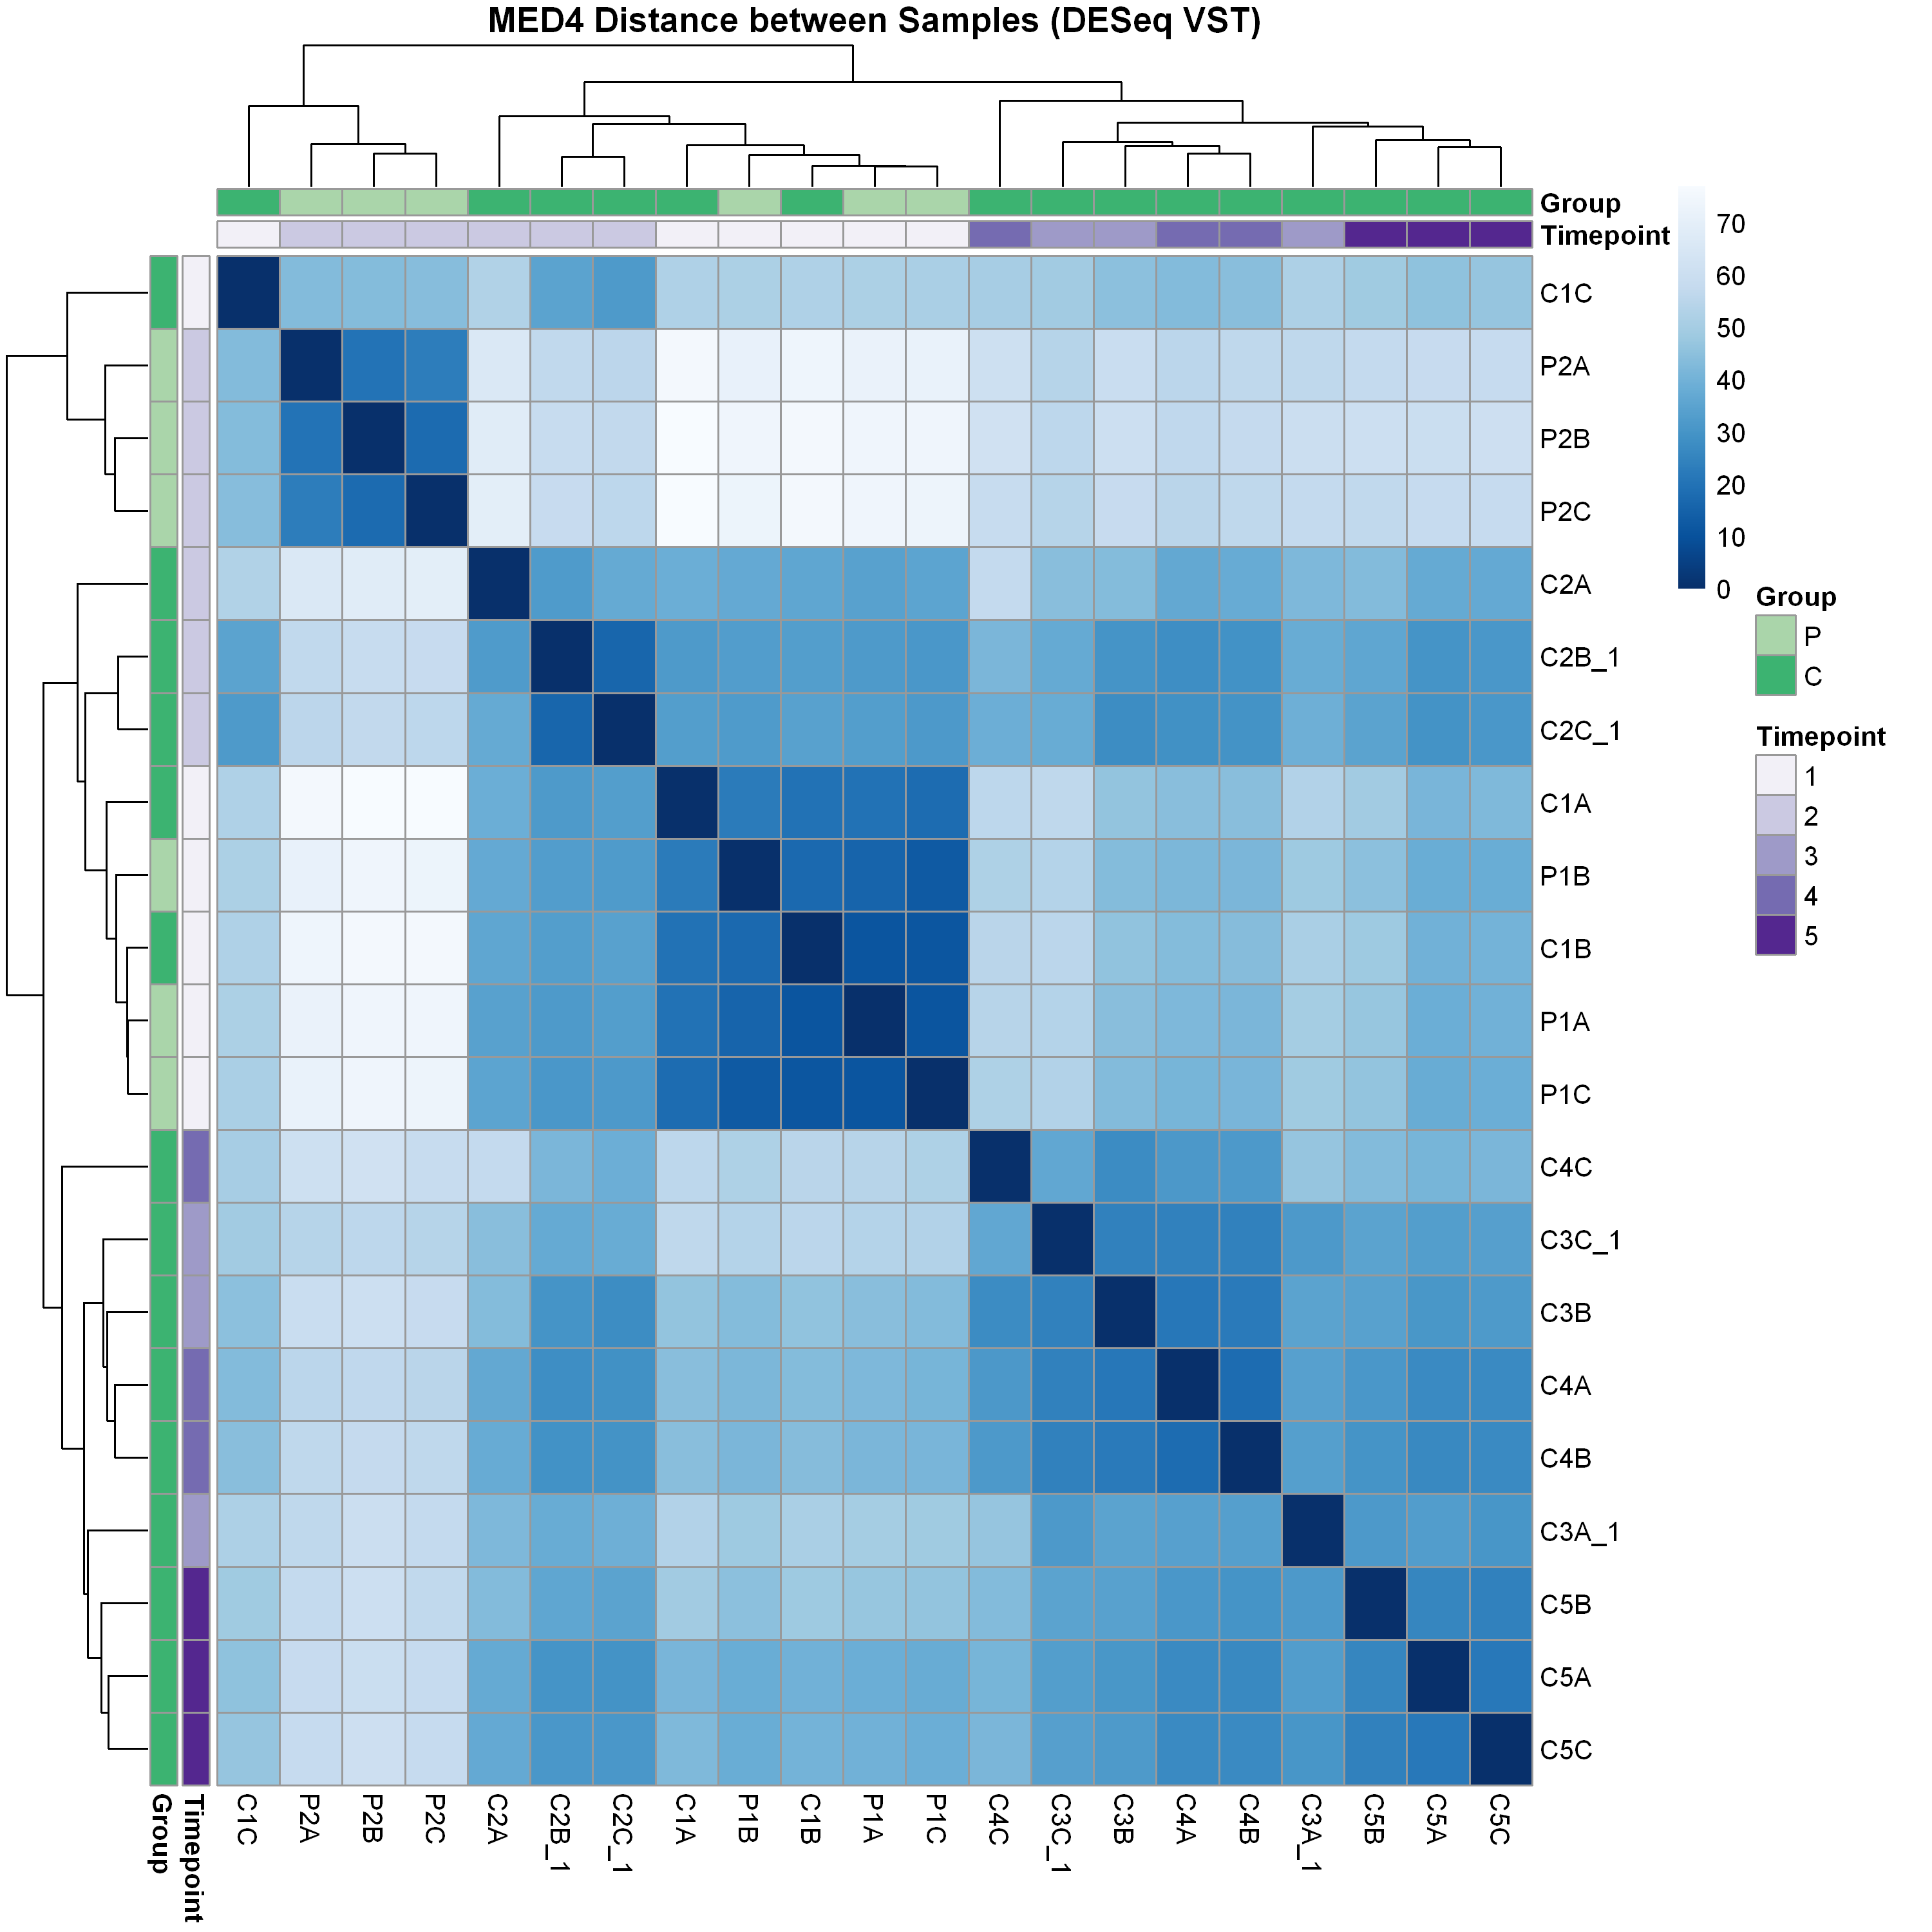

In [53]:
sampleDists <- dist(t(assay(vsd)))
#sampleDists
sampleDistMatrix <- as.matrix( sampleDists )
rownames(sampleDistMatrix) <- vsd$sample
colnames(sampleDistMatrix) <- vsd$sample
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
ann_df = colData(vsd)[c('Timepoint', 'Group')]

pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors,
         annotation_row = ann_df,
         annotation_col = ann_df,
         annotation_colors = ann_colors,
         main = "MED4 Distance between Samples (DESeq VST)"
)

In [54]:
head(sampleDistMatrix)

,C1A,C1B,C1C,C2A,C2B_1,C2C_1,C3A_1,C3B,C3C_1,C4A,⋯,C4C,C5A,C5B,C5C,P1A,P1B,P1C,P2A,P2B,P2C
C1A,0.00000,19.65269,52.25941,38.37592,31.70735,32.97042,52.92281,46.02848,56.05327,44.14446,⋯,55.79554,41.15866,48.98114,42.38490,19.69218,22.58418,18.01100,75.27370,76.99829,76.93617
C1B,19.65269,0.00000,52.53176,35.84882,32.96120,34.26810,51.06407,45.69288,55.24051,43.47056,⋯,54.80017,39.61349,48.05522,40.35717,11.07629,17.02582,11.23664,73.40119,75.37859,75.19289
C1C,52.25941,52.53176,0.00000,52.63746,34.88449,31.80592,51.73727,44.86210,48.97916,43.11782,⋯,50.21628,45.38460,48.77106,46.56450,51.46701,51.61170,51.14279,42.97827,43.23147,43.85884
C2A,38.37592,35.84882,52.63746,0.00000,32.22853,37.37441,41.99862,43.46264,44.23701,36.80320,⋯,57.10986,37.36417,43.02684,37.11368,34.16573,36.93844,35.19483,65.94133,68.48530,69.27499
C2B_1,31.70735,32.96120,34.88449,32.22853,0.00000,16.18414,38.04295,29.84988,37.15591,27.94519,⋯,41.37360,29.65561,35.70768,31.06933,31.78205,32.71370,30.86413,56.51384,58.43463,58.10074
C2C_1,32.97042,34.26810,31.80592,37.37441,16.18414,0.00000,39.20471,27.68058,37.78361,28.97148,⋯,38.69104,29.38075,35.00145,30.84799,33.00232,32.21033,31.69315,55.51199,56.91027,55.63699


In [55]:
m = as.data.frame(sampleDistMatrix)
m$sample1 = rownames(m)
mdist = pivot_longer(m, cols=colnames(sampleDistMatrix), 
            names_to='sample2',
            values_to='dist')
mdist = mdist %>% filter(sample1 != sample2)

In [56]:
mdist = left_join(mdist, colData(dds), 
          by=c('sample1' = 'sample'), suffix=c('', '_1'), copy=TRUE)
mdist = left_join(mdist, colData(dds), 
          by=c('sample2' = 'sample'), suffix=c('', '_2'), copy=TRUE)
head(mdist)


sample1,sample2,dist,sample_id,TGCnew.,Conc.Qubit.TGC..ng.ul.,init_RNA,Lib_conc..ng.ul.,Group,Timepoint,⋯,Lib_conc..ng.ul._2,Group_2,Timepoint_2,Replicate_2,Day_2,extraction_2,techincal_replicate_2,phase_2,groupandtime_2,treatment_2
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<dbl>,<fct>,<fct>,<chr>,<chr>,<fct>,<dbl>,<fct>,<fct>,<fct>
C1A,C1B,19.65269,C1A_S16,16,300,100,1.15,C,1,⋯,1.91,C,1,B,11,1,0,logExp,C1,C1
C1A,C1C,52.25941,C1A_S16,16,300,100,1.15,C,1,⋯,2.24,C,1,C,11,2,0,logExp,C1,C1
C1A,C2A,38.37592,C1A_S16,16,300,100,1.15,C,1,⋯,1.87,C,2,A,18,4,0,decline,C2,C2
C1A,C2B_1,31.70735,C1A_S16,16,300,100,1.15,C,1,⋯,2.28,C,2,B,18,2,0,decline,C2,C2
C1A,C2C_1,32.97042,C1A_S16,16,300,100,1.15,C,1,⋯,2.80,C,2,C,18,2,0,decline,C2,C2
C1A,C3A_1,52.92281,C1A_S16,16,300,100,1.15,C,1,⋯,1.20,C,3,A,31,4,0,longterm,C3,C3


In [57]:
dput(colnames(mdist))

c("sample1", "sample2", "dist", "sample_id", "TGCnew.", "Conc.Qubit.TGC..ng.ul.", 
"init_RNA", "Lib_conc..ng.ul.", "Group", "Timepoint", "Replicate", 
"Day", "extraction", "techincal_replicate", "phase", "groupandtime", 
"treatment", "sample_id_2", "TGCnew._2", "Conc.Qubit.TGC..ng.ul._2", 
"init_RNA_2", "Lib_conc..ng.ul._2", "Group_2", "Timepoint_2", 
"Replicate_2", "Day_2", "extraction_2", "techincal_replicate_2", 
"phase_2", "groupandtime_2", "treatment_2")


In [58]:
cgroup_levels = c("PP",  "CP", "CC")
cgroup_levels = c("Distance from P to P",  "Distance from C to P", 
                  "Distance from C to C")
ctime_levels = c(
    "11", 
    "21", '22', 
    '31', '32', "33", 
    '41', '42', "43", "44", 
    '51', '52', "53", "54", "55"
)
cself= c('11', '22', '33','44', '55')
mdist = mdist %>% 
   mutate(combgroup = paste('Distance from', Group, 'to', Group_2),
          combtime = paste0(Timepoint, Timepoint_2),
          self = combtime %in% cself
         ) %>%
   rename(Distance_to_timepoint = Timepoint_2 ) %>%
   filter(combgroup %in% cgroup_levels, combtime %in% ctime_levels)
  
dput(unique(mdist$combgroup))
dput(unique(mdist$combtime))

c("Distance from C to C", "Distance from C to P", "Distance from P to P"
)
c("11", "21", "22", "31", "32", "33", "41", "42", "43", "44", 
"51", "52", "53", "54", "55")


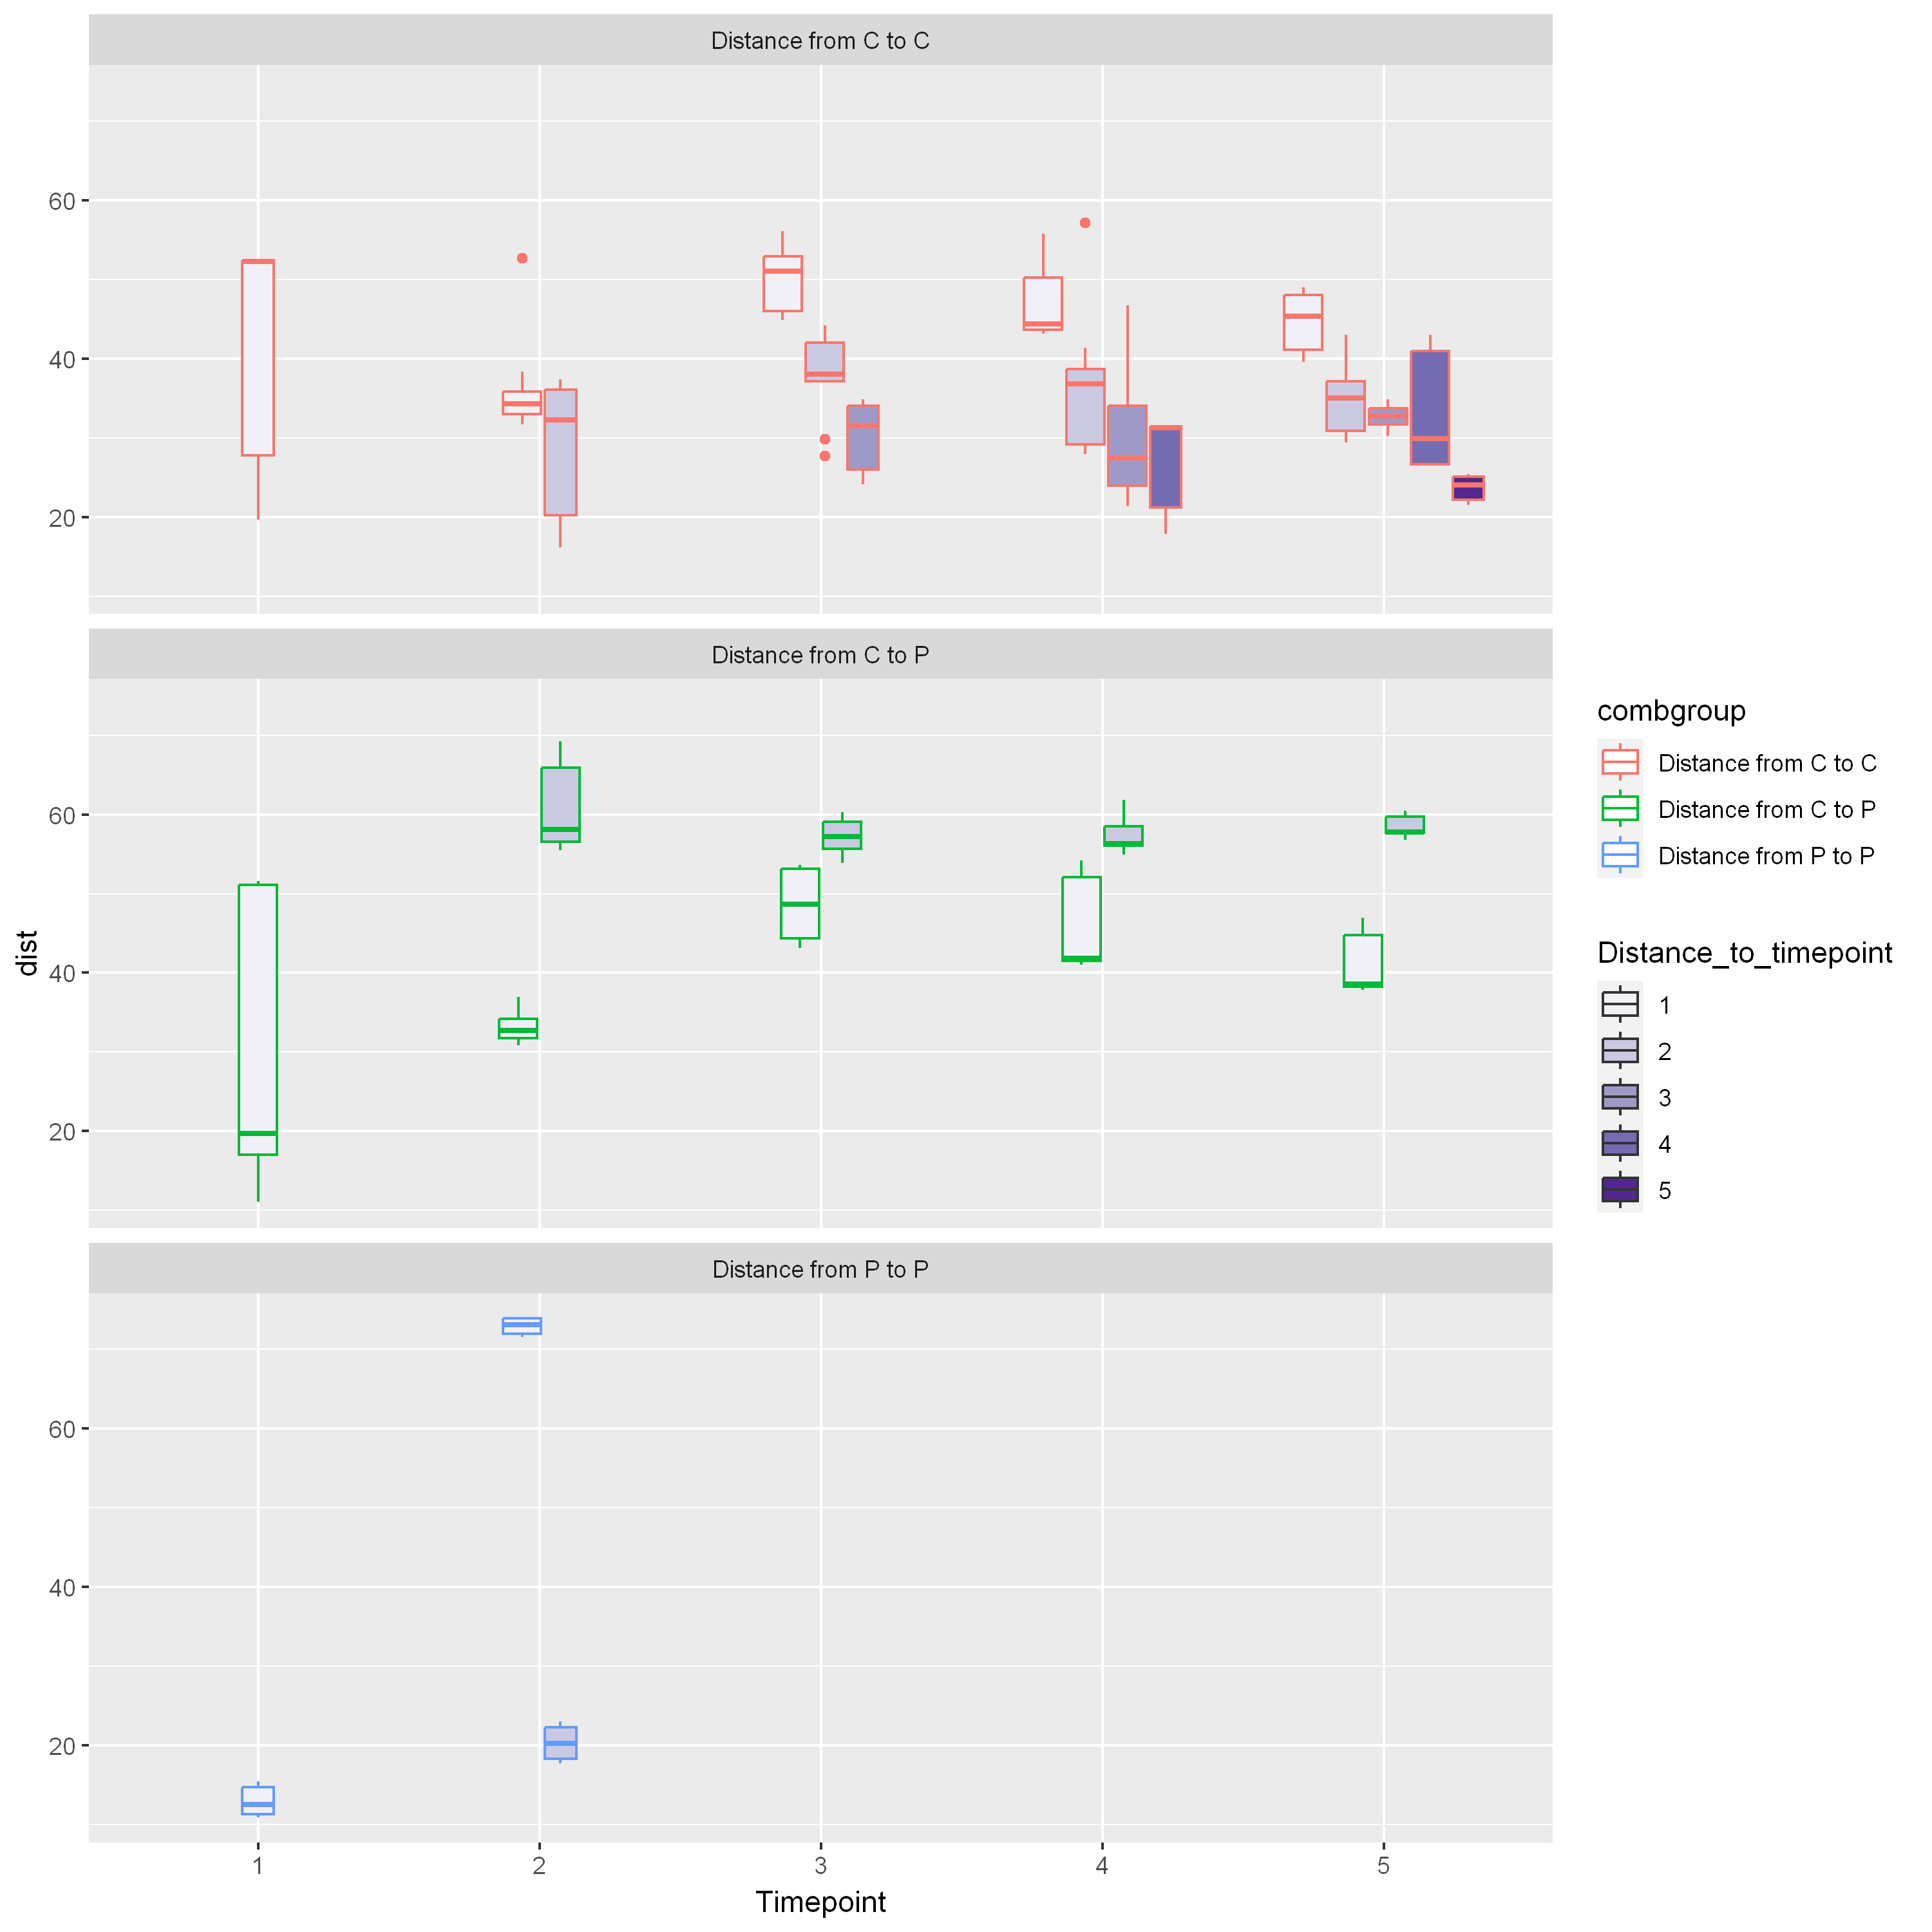

In [59]:
ggplot(mdist, aes(x=Timepoint, y=dist, fill=Distance_to_timepoint, 
                  color=combgroup)) +
   #geom_point() +
   #geom_line(aes(group=Timepoint_2))
   geom_boxplot(varwidth = TRUE) +
   scale_fill_manual(values = ann_colors$Timepoint) +
   facet_wrap(~combgroup, ncol=1)

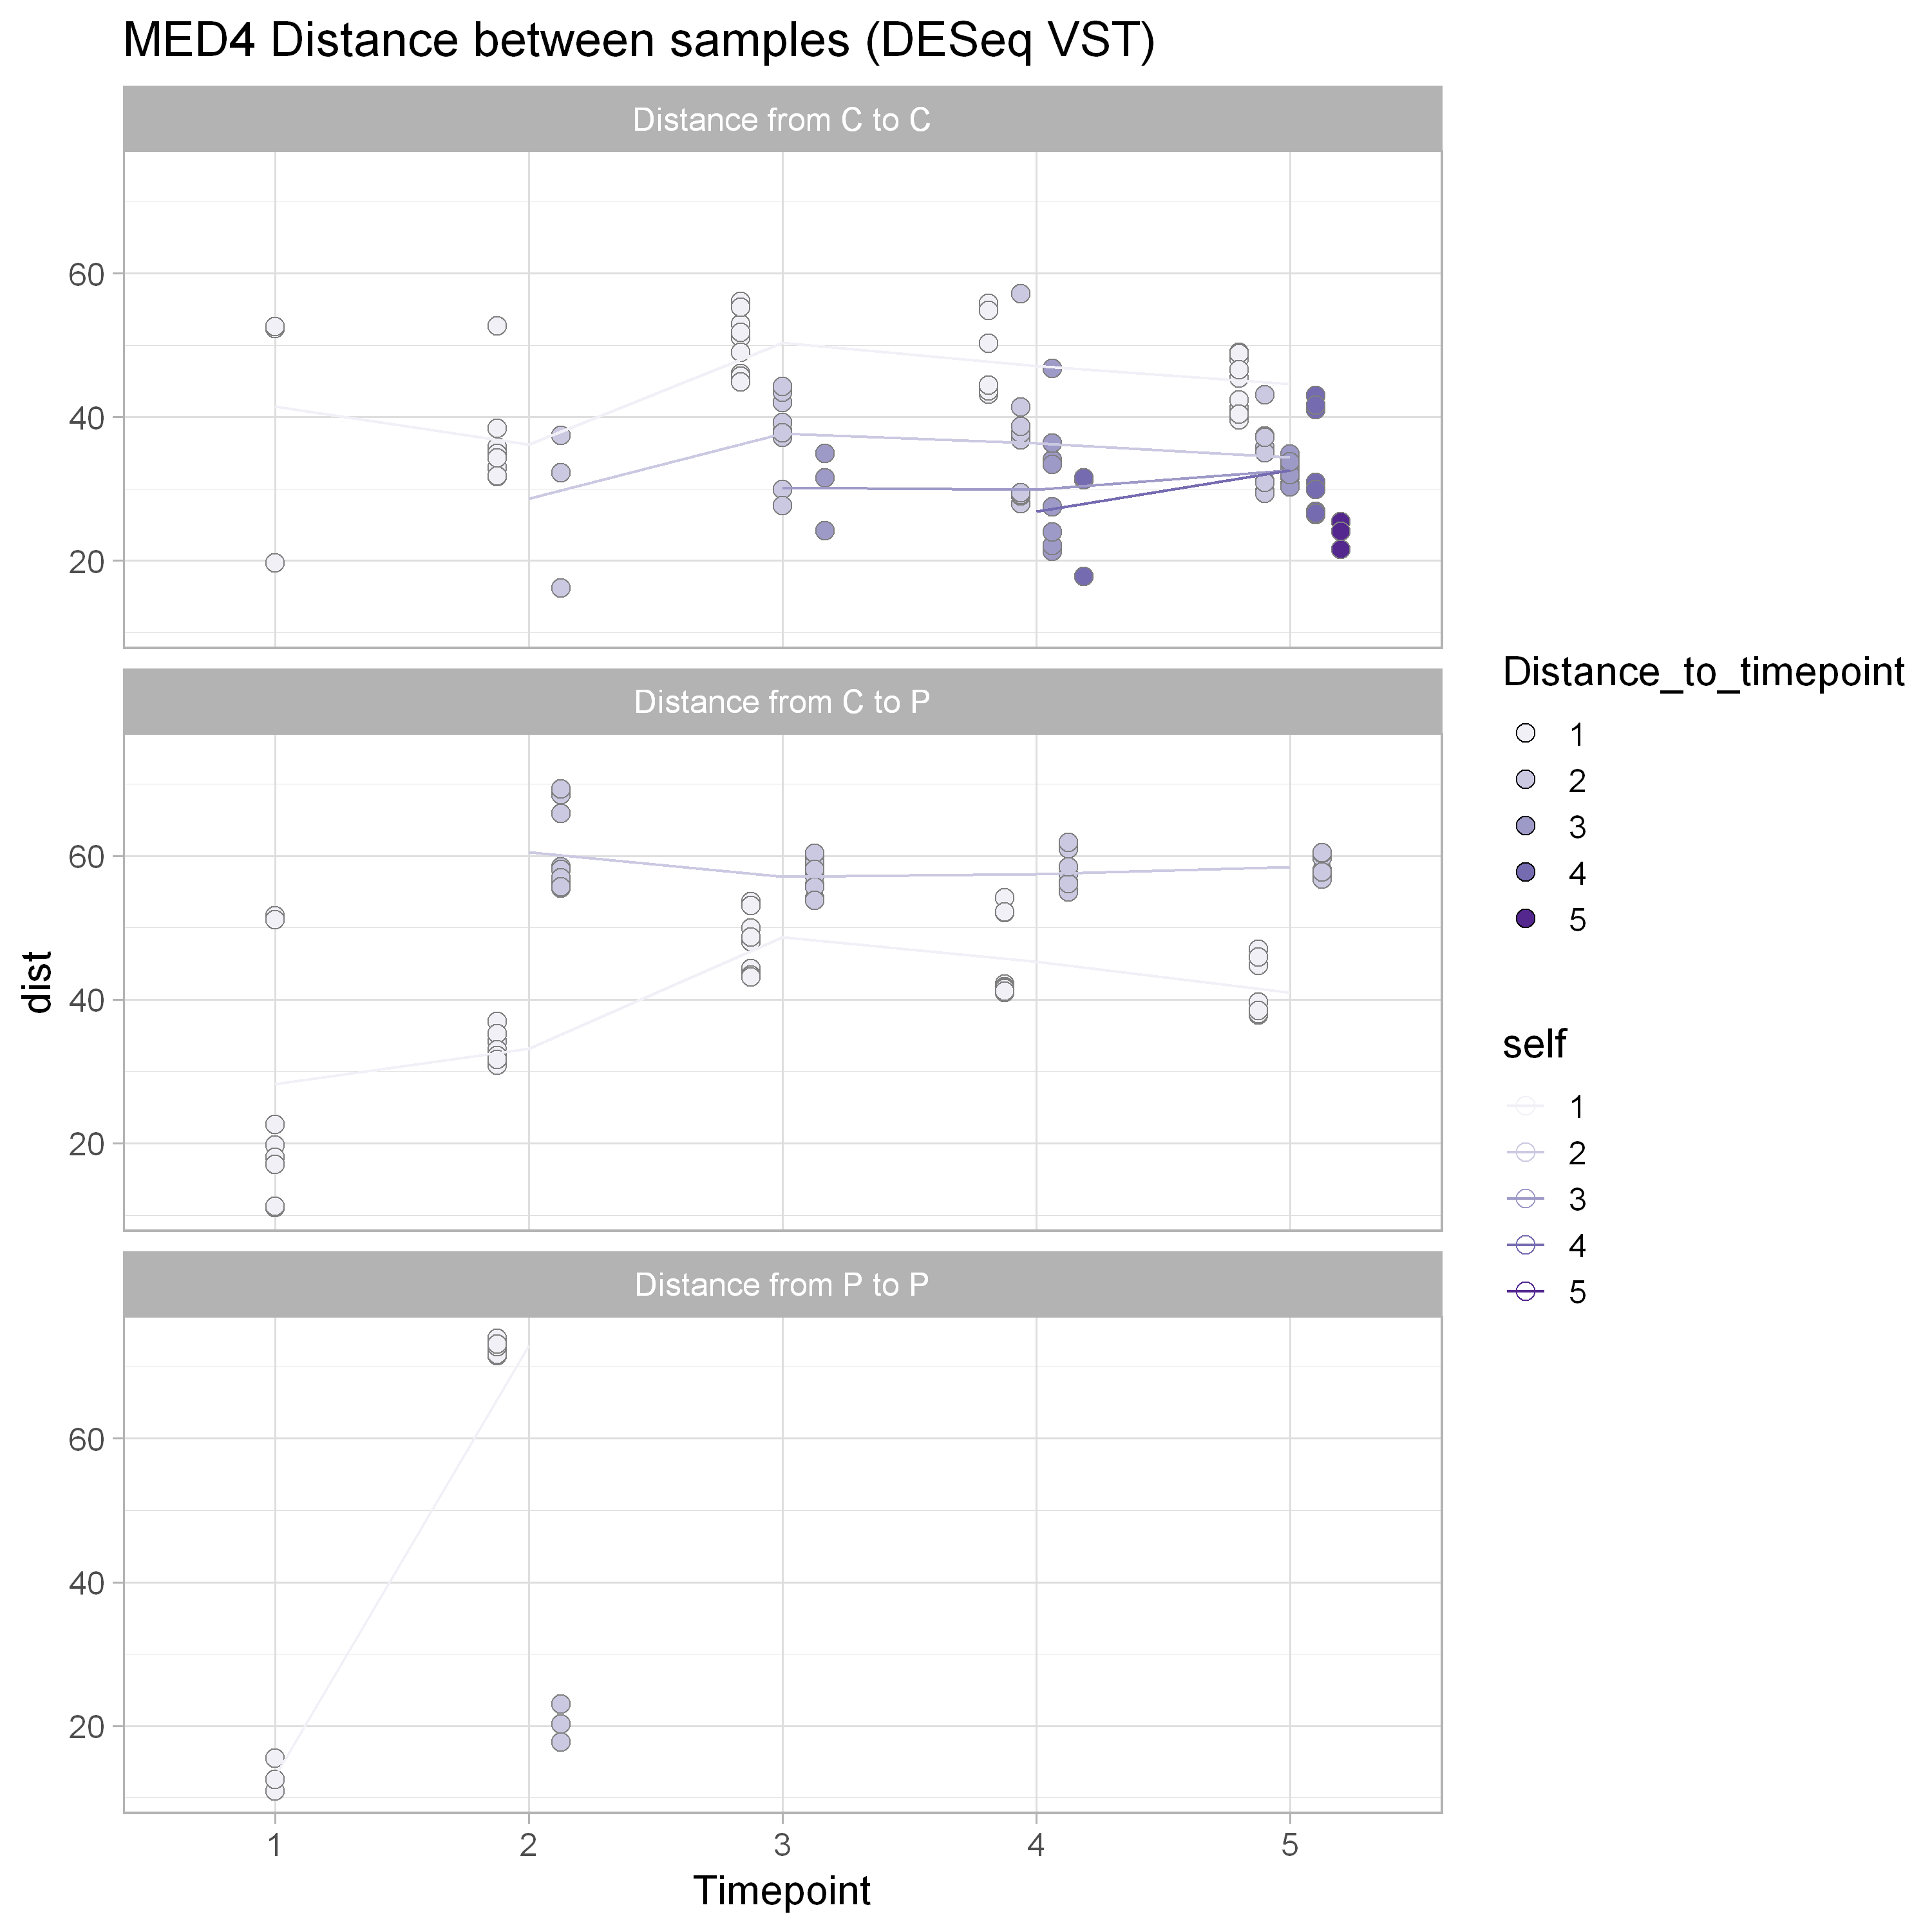

In [60]:
ggplot(mdist, aes(x=Timepoint, y=dist, fill=Distance_to_timepoint, 
                  color=self,
                  group=Distance_to_timepoint)) +
   geom_point(shape = 21, stroke = 0.5,
       position=position_dodge(width=0.5), #color='grey',
             size=3) +
   stat_summary(aes(color=Distance_to_timepoint), fun=mean, geom="line") +
   #geom_line(aes(group=Timepoint_2))
   #geom_boxplot(varwidth = TRUE) +
   scale_fill_manual(values = ann_colors$Timepoint) +
   scale_color_manual(values = ann_colors$Timepoint) +
   facet_wrap(~combgroup, ncol=1) +
  ggtitle("MED4 Distance between samples (DESeq VST)") +
  theme_light(base_size = 15)


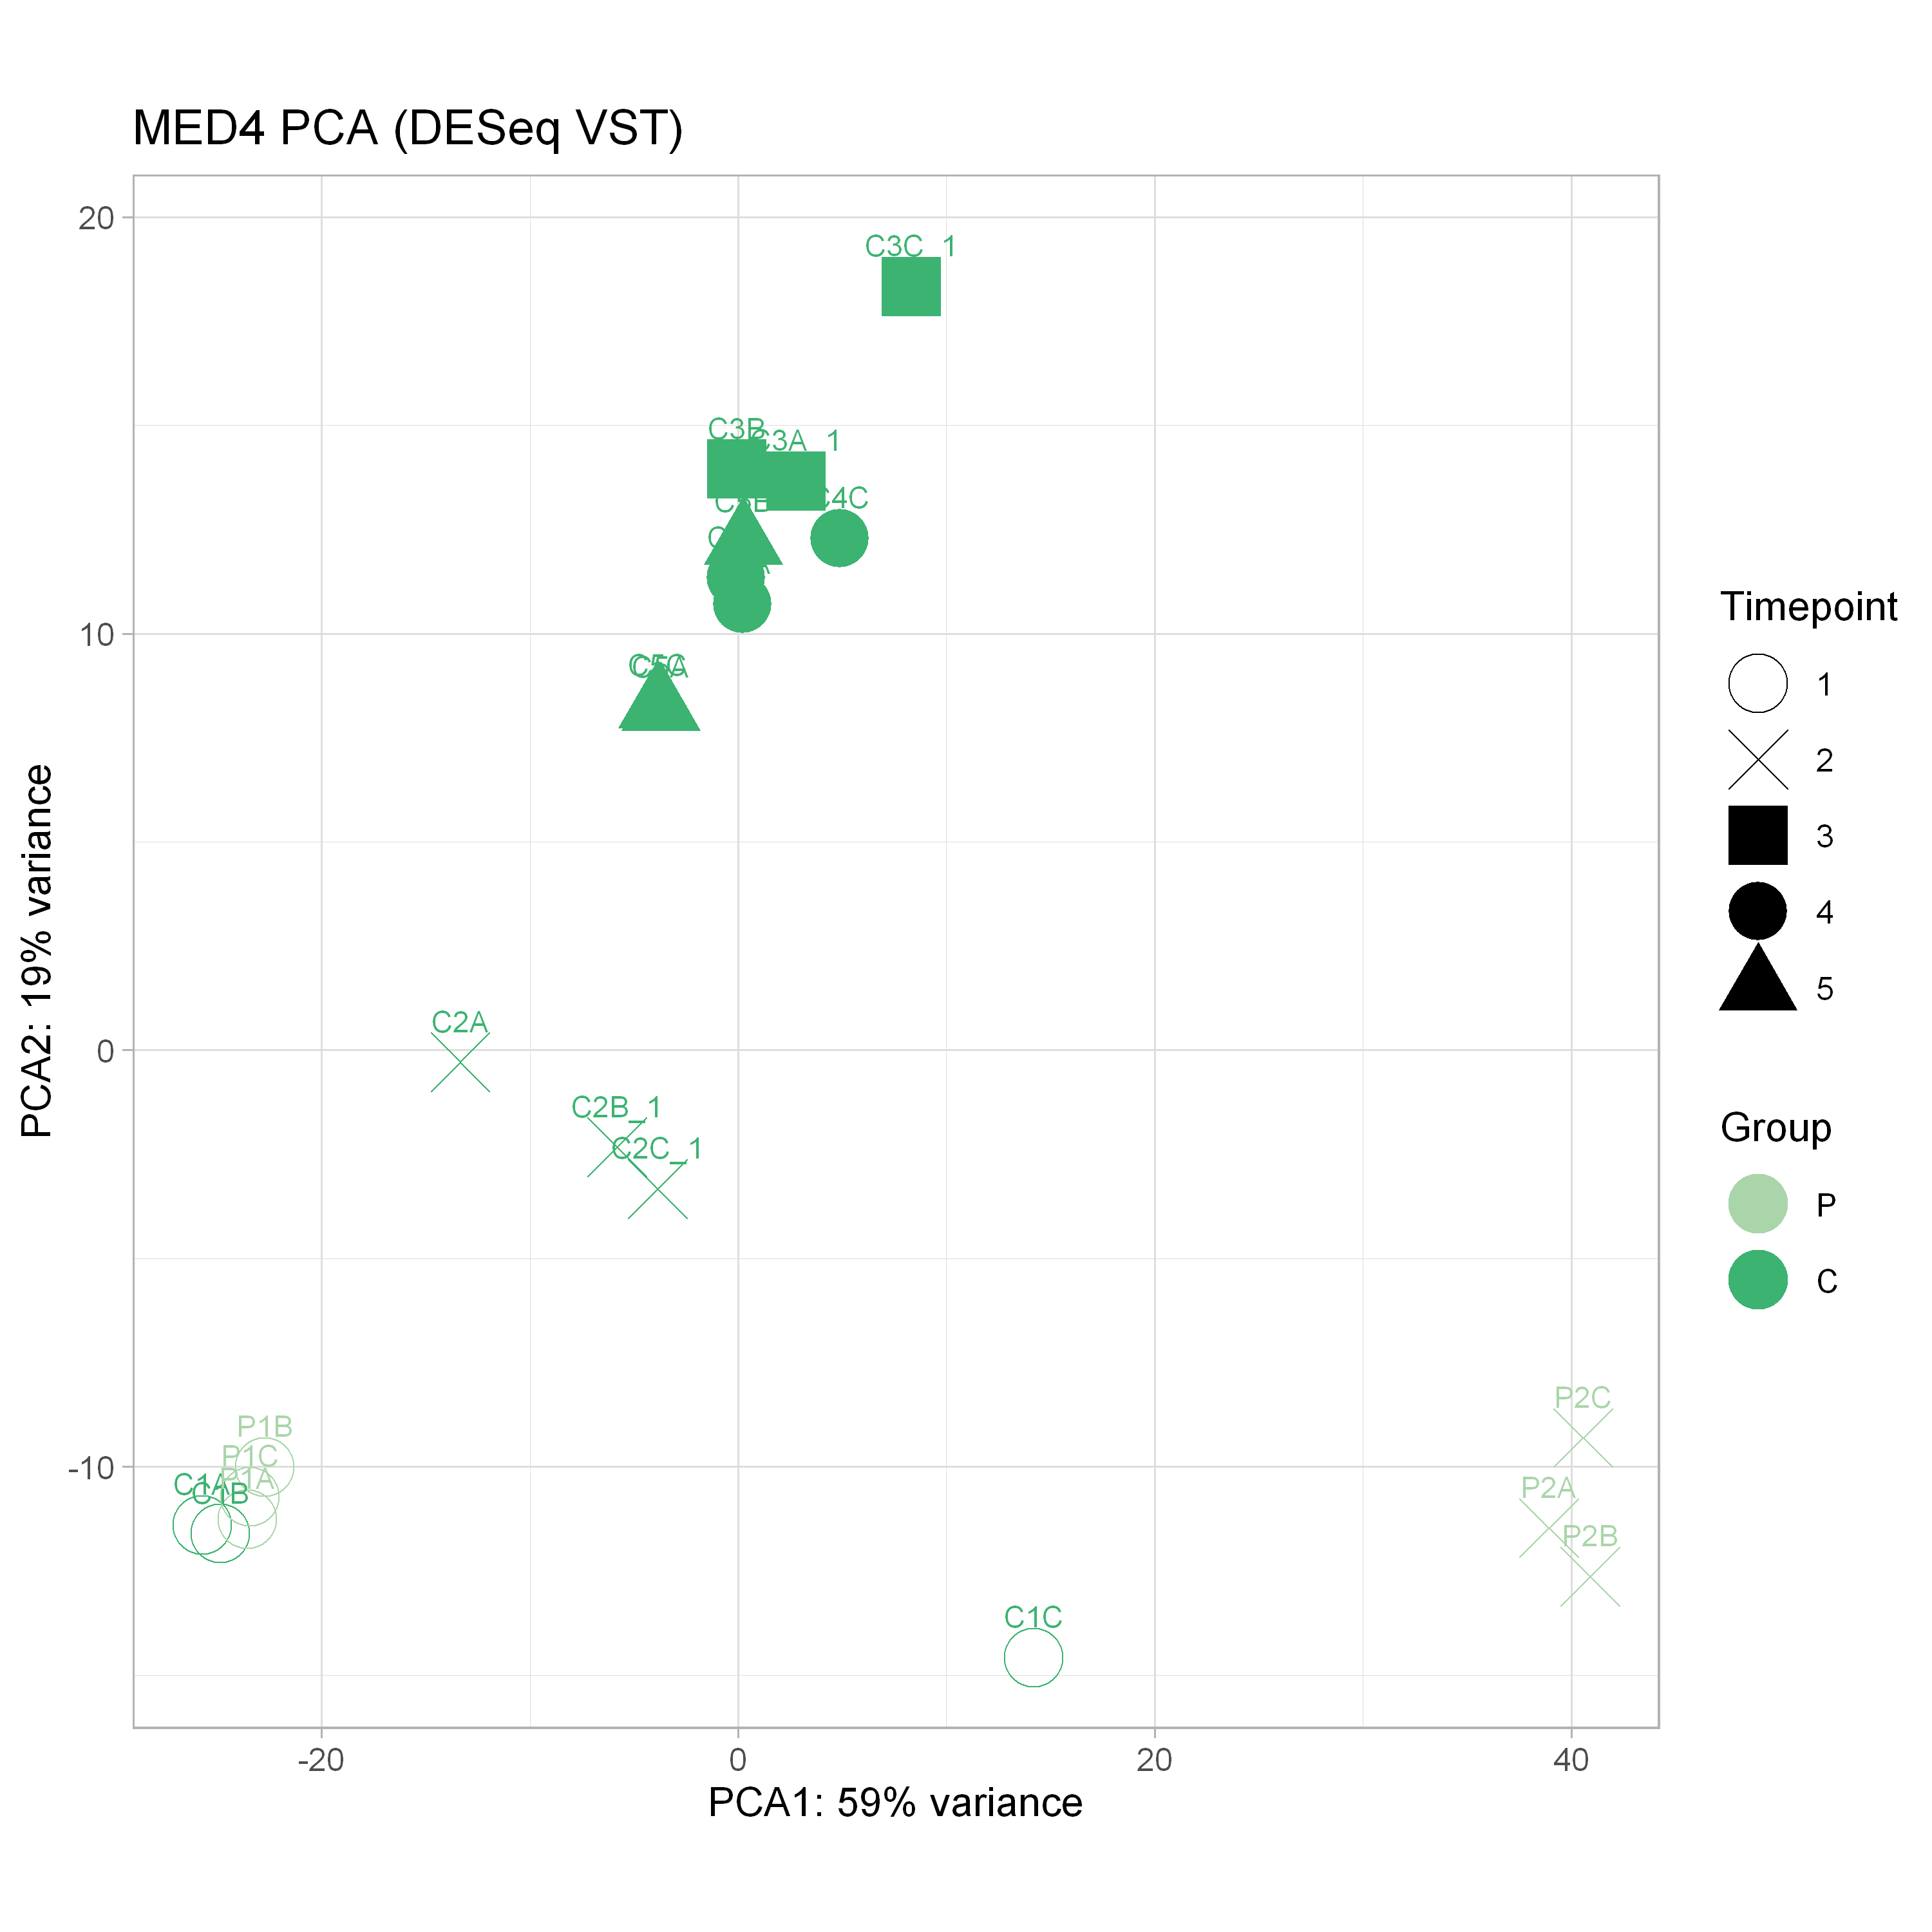

In [61]:
pcaData <- plotPCA(vsd, intgroup = c( "Timepoint", "Group", 'sample'), 
                   returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
gpal = brewer.pal(4, 'Dark2')

ggplot(pcaData, aes(x = PC1, y = PC2, 
                    color = Group, shape = Timepoint, label=sample)) +
  geom_point(size =10) +
  xlab(paste0("PCA1: ", percentVar[1], "% variance")) +
  ylab(paste0("PCA2: ", percentVar[2], "% variance")) +
  coord_fixed(ratio=2) +
  geom_text(nudge_y = 1) +
  scale_color_manual(values = ann_colors$Group) +
  scale_shape_manual(values=c(1, 4, 15, 16, 17))+
  ggtitle("MED4 PCA (DESeq VST)") +
  theme_light(base_size = 15)



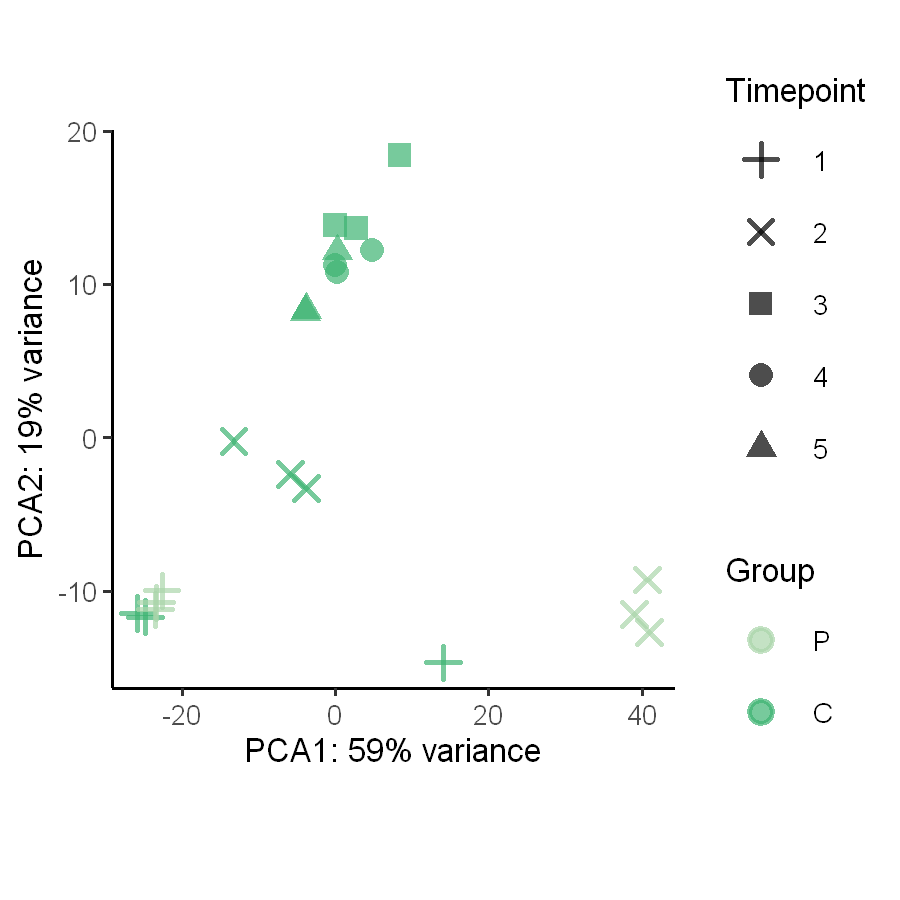

In [62]:
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res = 300)
pcaData <- plotPCA(vsd, intgroup = c( "Timepoint", "Group", 'sample', 'treatment'), 
                   returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
gpal = brewer.pal(4, 'Dark2')

ggplot(pcaData, aes(x = PC1,  y = PC2, 
                    color = Group, shape = Timepoint, label=sample)) +
  geom_point(size =2, stroke = 1, alpha=0.7, position=position_jitter(h=0.1,w=0.1)) +
  xlab(paste0("PCA1: ", percentVar[1], "% variance")) +
  ylab(paste0("PCA2: ", percentVar[2], "% variance")) +
  coord_fixed(ratio=2) +
  #geom_text(nudge_y = 1) +
  scale_color_manual(values = ann_colors$Group) +
  scale_shape_manual(values=c(3,4, 15,16,17))+
  #ggtitle("1A3 PCA (DESeq VST)") +
  theme_classic(base_size = 8)  



In [63]:
assay(vsd)# [,c('C1', 'C2', 'C3', 'C4', 'C5')] #%>% select(starts_with('C')) # %>% rowSds() %>% hist()
#hist(rowSds(assay(vsd)))

,C1A,C1B,C1C,C2A,C2B_1,C2C_1,C3A_1,C3B,C3C_1,C4A,⋯,C4C,C5A,C5B,C5C,P1A,P1B,P1C,P2A,P2B,P2C
TX50_RS00020,10.197789,10.137026,11.551839,10.231606,10.845970,10.967706,10.276325,10.707136,10.924569,10.787761,⋯,10.672786,10.902576,10.827062,10.565269,10.144407,10.131804,9.978487,11.671083,12.074911,12.088826
TX50_RS00025,7.189850,7.393002,8.063591,7.604710,7.021640,7.283135,6.700137,6.543573,6.075139,6.945366,⋯,6.818325,7.111350,6.396242,7.168143,7.405143,6.951857,7.471048,7.090091,7.564569,7.695121
TX50_RS00030,8.595018,8.767077,10.000578,8.894006,8.842382,9.165596,9.713759,9.515646,9.786708,9.755955,⋯,10.292260,9.574673,9.986908,10.009402,8.770248,8.956367,8.764391,11.020363,11.593161,11.775361
TX50_RS00035,8.461356,8.533928,8.313640,8.512806,8.367376,8.568328,8.518482,8.576821,8.185768,8.748524,⋯,8.790840,8.498094,8.512656,8.729793,8.436822,8.771630,8.484424,9.183184,9.906220,10.218413
TX50_RS00040,9.314062,9.539971,10.612193,9.653086,10.012622,9.938847,9.328522,9.156658,9.209129,9.646198,⋯,9.541243,9.512674,9.407988,9.469649,9.353594,9.503833,9.256947,10.599051,10.179929,10.278258
TX50_RS00045,7.038385,6.816078,8.308530,7.842737,7.101566,7.186951,6.183583,7.487050,7.145769,7.525057,⋯,6.613830,7.032976,6.844117,6.932864,6.825452,6.405064,6.851980,8.175457,8.880102,8.502858
TX50_RS00050,7.279405,7.168785,9.019422,8.149004,8.020625,8.280763,8.571828,8.724191,9.027292,8.628945,⋯,8.963183,8.158427,8.128318,8.410152,7.114360,7.024342,7.326086,9.390989,9.586467,9.750481
TX50_RS00055,10.873555,10.268267,11.461827,9.690779,11.111153,11.334165,11.154344,11.449454,11.220539,10.987290,⋯,11.197202,10.888222,10.858201,10.690413,10.152716,10.557417,10.429373,10.895344,10.543083,10.894708
TX50_RS00060,7.502344,7.760853,8.470568,7.619019,7.465803,7.939864,7.900277,6.892245,7.339339,7.544796,⋯,6.499429,7.496971,6.637683,7.621185,7.612435,7.569849,7.557614,7.113228,7.198058,7.124057
TX50_RS00065,8.295095,8.004818,7.489716,7.590257,7.600092,7.391558,8.095140,8.002099,7.662352,8.058627,⋯,8.563062,7.425236,8.080334,7.998798,8.099163,8.194159,7.832543,7.006037,6.833603,7.015379


In [64]:
alpha=0.01

In [65]:
dds <- DESeq(dds)
res <- results(dds, alpha=alpha)
res

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): treatment longterm vs P1 
Wald test p-value: treatment longterm vs P1 
DataFrame with 1855 rows and 6 columns
              baseMean log2FoldChange     lfcSE      stat      pvalue
             <numeric>      <numeric> <numeric> <numeric>   <numeric>
TX50_RS00020  1911.213       0.629330  0.278813  2.257176 0.023997093
TX50_RS00025   129.727      -0.480373  0.272581 -1.762314 0.078016220
TX50_RS00030  1008.790       1.067924  0.281874  3.788655 0.000151465
TX50_RS00035   436.526       0.104494  0.200899  0.520132 0.602971503
TX50_RS00040   836.808       0.135500  0.231516  0.585272 0.558364714
...                ...            ...       ...       ...         ...
TX50_RS09870   34.4138      -0.362535  0.372761 -0.972568  0.33076797
TX50_RS09875   73.9437      -0.512093  0.453922 -1.128154  0.25925508
TX50_RS09880  139.8116      -0.304622  0.378997 -0.803759  0.42153628
TX50_RS09885  219.9974      -0.295725  0.194459 -1.520754  0.12832156
TX50_RS09890  163.0409    

In [66]:
s = summary(res)
s


out of 1855 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 221, 12%
LFC < 0 (down)     : 204, 11%
outliers [1]       : 8, 0.43%
low counts [2]     : 36, 1.9%
(mean count < 10)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



NULL

In [67]:
sum_dds <- function(name) {
    res = results(dds, contrast=name)
    sum = table(as.data.frame(res) %>% mutate(
           contrast = paste0(name[2],'vs', name[3]),
        na_pvalue = is.na(pvalue),
               na_padj = is.na(padj),
               significant = padj < 0.05,
               direction = if_else(log2FoldChange > 0, 'up', 'down'),
               status = if_else(na_pvalue, 'outlier',
                                if_else(na_padj, 'lowcount', 
                                        if_else(significant, direction, 'no_significant'
                                        
                               )))
               ) %>% select(status))
    #sum = cbind(sum, name=name)
    return(sum)
    }


In [68]:
get_dds <- function(name) {
    res = results(dds, contrast=name)
    res = as.data.frame(res) %>% 
       mutate(
           contrast = paste0(name[2],'vs', name[3]),
           na_pvalue = is.na(pvalue),
           na_padj = is.na(padj),
           significant = padj < 0.05,
           direction = if_else(log2FoldChange > 0, 'up', 'down'),
           status = if_else(na_pvalue, 'outlier',
                            if_else(na_padj, 'lowcount', 
                                    if_else(significant, direction, 'no_significant'
                                           )))
       ) 
    return(res)
}


In [70]:
results_names = resultsNames(dds)

dds$treatment = factor(dds$treatment, levels=c('P1', 'C1', 'C2', 'C3', 'longterm', 'NA'))

contrasts_to_check = list (
    c('treatment','longterm','P1'), 
    c('treatment','longterm','P2'), 
    c('treatment','longterm','C1'), 
    c('treatment','longterm','C2'),
    c('treatment','longterm','C3')
)

contrasts_to_check

[[1]]
[1] "treatment" "longterm"  "P1"       

[[2]]
[1] "treatment" "longterm"  "P2"       

[[3]]
[1] "treatment" "longterm"  "C1"       

[[4]]
[1] "treatment" "longterm"  "C2"       

[[5]]
[1] "treatment" "longterm"  "C3"

In [71]:
#bind_rows(
sum_df = lapply(contrasts_to_check, sum_dds) %>% bind_rows 
sum_df$name= contrasts_to_check
sum_df


down,no_significant,outlier,up,lowcount,name
<table[1d]>,<table[1d]>,<table[1d]>,<table[1d]>,<table[1d]>,<list>
312,1226,8,309,NA,treatmen....
436,878,8,533,NA,treatmen....
278,1363,8,206,NA,treatmen....
101,1624,8,122,NA,treatmen....
14,824,8,4,1005,treatmen....


In [72]:
#bind_rows(
res_df = lapply(contrasts_to_check, get_dds) %>% 
  bind_rows %>%
  rownames_to_column(var = 'gene_id') 

write_csv(res_df, file.path('DE_results','MED4_DE_DESEQ_longterm_results.csv'))


In [73]:
sum_df = sum_df %>% 
   filter(name != 'Intercept') %>% 
   mutate(tot_fc = up + down, 
         name = str_remove(name, 'treatment_'))

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `name = str_remove(name, "treatment_")`.
Caused by warning in `stri_replace_first_regex()`:
! argument is not an atomic vector; coercing"


In [74]:
sum_df

down,no_significant,outlier,up,lowcount,name,tot_fc
<table[1d]>,<table[1d]>,<table[1d]>,<table[1d]>,<table[1d]>,<chr>,<table[1d]>
312,1226,8,309,NA,"c(""treatment"", ""longterm"", ""P1"")",621
436,878,8,533,NA,"c(""treatment"", ""longterm"", ""P2"")",969
278,1363,8,206,NA,"c(""treatment"", ""longterm"", ""C1"")",484
101,1624,8,122,NA,"c(""treatment"", ""longterm"", ""C2"")",223
14,824,8,4,1005,"c(""treatment"", ""longterm"", ""C3"")",18


In [75]:
dds@design

~treatment

In [76]:
res_df

gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,na_pvalue,na_padj,significant,direction,status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
TX50_RS00020...1,1911.21342,0.62933012,0.2788131,2.2571758,2.399709e-02,6.414274e-02,longtermvsP1,FALSE,FALSE,FALSE,up,no_significant
TX50_RS00025...2,129.72678,-0.48037311,0.2725808,-1.7623142,7.801622e-02,1.604632e-01,longtermvsP1,FALSE,FALSE,FALSE,down,no_significant
TX50_RS00030...3,1008.79020,1.06792418,0.2818742,3.7886551,1.514650e-04,1.056363e-03,longtermvsP1,FALSE,FALSE,TRUE,up,up
TX50_RS00035...4,436.52573,0.10449393,0.2008988,0.5201321,6.029715e-01,7.175827e-01,longtermvsP1,FALSE,FALSE,FALSE,up,no_significant
TX50_RS00040...5,836.80795,0.13549968,0.2315157,0.5852722,5.583647e-01,6.775950e-01,longtermvsP1,FALSE,FALSE,FALSE,up,no_significant
TX50_RS00045...6,162.04778,0.40214914,0.3624824,1.1094308,2.672444e-01,3.988414e-01,longtermvsP1,FALSE,FALSE,FALSE,up,no_significant
TX50_RS00050...7,364.42876,1.47574323,0.3386498,4.3577265,1.314205e-05,1.411242e-04,longtermvsP1,FALSE,FALSE,TRUE,up,up
TX50_RS00055...8,1881.38155,0.51750002,0.2937498,1.7617036,7.811939e-02,1.604967e-01,longtermvsP1,FALSE,FALSE,FALSE,up,no_significant
TX50_RS00060...9,163.35588,-0.48557827,0.3244364,-1.4966826,1.344759e-01,2.374540e-01,longtermvsP1,FALSE,FALSE,FALSE,down,no_significant
